**7137CEM - Deep Learning: Group Assignment**
--

By
- Sridhar Reddy Yarava (yaravas) - 13355696
- Nohith Amirineni (amirinenin)	- 13355559
- Karthik B M (bmk)	- 13355593

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)


d:\Code\IISC\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 612M/612M [05:48<00:00, 1.84MB/s] 

Extracting files...


Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [4]:
!mkdir content 


The syntax of the command is incorrect.


**Traffic Sign Recognition: Taher’s Model and Modifications**
--

Taher's Traffic Sign Recognition model is an important step in the field of intelligent transportation systems, since it improves road safety by correctly identifying traffic signs. Taher's model, which is based on Convolutional Neural Networks (CNNs), performs well in identifying a variety of traffic sign types.

Understanding the value of ongoing development, we have set out to enhance Taher's concept even further. Our goal is to improve the model's accuracy and usefulness in everyday use by making careful adjustments and improvements. We have included the InceptionV3 pre-trained model, a complex architecture well-known for image classification applications, by utilizing the power of Transfer Learning.

We have optimized Taher's original model by carefully adding Conv2D, MaxPool2D, Dense, Flatten, and Dropout layers in addition to implementing InceptionV3. By adjusting the architecture to the subtleties of traffic sign identification, these changes seek to take advantage of the rich characteristics that InceptionV3 has learnt. The result is a hybrid model with increased accuracy and robustness that skilfully combines the advantages of a pre-trained model with task-specific modifications.

Importing Libraries and Setting Up Environment
--

NumPy, Pandas, Matplotlib, OpenCV, TensorFlow, and other required libraries are imported in the first code blocks. Taher makes sure that the environment is suitable for creating and using deep learning models for traffic sign recognition. The role of this libraries is as follows
- The NumPy is used to perfom the scientific computing in Python. It is used for numberic operation and arrays handling, which will play a vital role in image processing and manipulation.
- The Pandas is powerful libary for handling the data, that provides the data structure for efficient data analysis. Also it can handle the tabular data efficiently. It was used to read the data from the CSV file and perfoming data exploration.
- Matplotlib is 2D plotting library used to provide visualizations in Python. It is used for charting performance measures including loss and accuracy over training epochs, presenting visuals, and visualizing data distributions.
- For operations involving the loading, resizing, and manipulation of images, OpenCV is utilized. In computer vision applications, such as preprocessing pictures for deep learning model training, it is an invaluable tool.
- TensorFlow is developed by Google which an open source deep learning framework. It provides tools and librires which can be used for deep learning models. It is a core library used in the development, testing, and training of deep learning models. It has features for creating neural networks, specifying loss functions, training and improving models.
- PIL is Python Imaging library which will be used for loading and resizing the images. It helps the OpenCV in image processing.
- The OS and pathlib libraries are used for reading the folder directories of input dataset, which can also be used for loading datasheets and saving model files.
- A library called Random can be utilized as an alternative optimizer while teaching neural networks. It is selected based on trial and error method also for possible advantages of particular issue.
- The sklearn named Scikit-learn is used to calculate the model perfomance. the train_test_split is a function which will commonly used to splitting datasets into traning and testing sets.
- Pre-trained models, such as MobileNetV2, VGG19 are accessed via TensorFlow Hub and utilized as basic models for transfer learning. It makes easier to incorporate pre-trained models into unique structures.

We are using the pre tranied transfer learning model which is **Transfer Learning with InceptionV3** for this we are importing the libraries and also given the overview about them below.

__InceptionV3 Model Import__
- Imports the pre-trained InceptionV3 model, a widely used architecture for image classification applications. Using InceptionV3's transfer learning feature, one may improve performance on a particular task by applying the information gleaned from a big dataset (ImageNet).

__Image Preprocessing and Decoding Libraries__
- **image**: This will help us to import and prepare photos before supplying them to a neural network.
- **preprocess_input**: It includes InceptionV3-specific preparation methods to make sure input photos are prepared appropriately before prediction.
- **decode_predictions**: This will generate a list of (class, description, probability) for every prediction by translating the outcomes of the predictions into human-readable labels.

__Layers for Custom Model__
- **Conv2D**: Convolutional layer for 2D spatial convolution.
- **MaxPool2D**: Max pooling layer for down sampling  spatial dimensions.
- **Dense**: Fully connected layer.
- **Flatten**: Input must be compressed in order to go from convolutional layers to fully connected layers.
- **Dropout**: A regularization method that, in order to minimize overfitting, randomly sets some of the input units to zero during training.

The code in this patch indicates a move toward Transfer Learning using the InceptionV3 architecture. The chosen libraries allow extra layers to be designed for a bespoke model that customizes the architecture to the particular Traffic Sign Recognition problem, in addition to including InceptionV3 as the foundation model. Conv2D, MaxPool2D, Dense, Flatten, and Dropout layers are incorporated to enable the development of a unique model that makes use of the characteristics acquired by InceptionV3 and adjusts to the subtleties of the traffic sign dataset. By adding task-specific modifications to a pre-trained model, this method seeks to improve both model performance and resilience.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19

# Transfer Learning with InceptionV3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


Data Directories and Image Dimensions
--

__Data Directories:__
- The variable data_dir will store the folder path of where the German Traffic Sign Recognition Benchmark (GTSRB) dataset is located.
- The variable train_path will store the folder path of the training set within the GTSRB dataset.
- The variable test_path will store the folder path of the test set within the GTSRB dataset.

__Image Dimensions:__
- Sets the major image parameters like height and width to 50 pixels each.

In [24]:
data_dir = 'content/'
train_path = 'content/Train/'
test_path = 'content/Test/'
height = 50
width = 50

Traffic Sign Classes
--

- This block builds a dictionary named classes, which associates class indices with description of traffic signs. A distinct traffic sign class is represented by each key-value pair in the dictionary.
- Using this dictionary, the model's output is decoded to provide human-readable labels for every type of predicted traffic signs.
- By linking descriptive strings with numerical class indices, it facilitates awareness of the model's predictions for traffic sign identification.(D. Yasmina, 2018)(Myat Nyein Chan, 2021)

In [20]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }


Batch Size and Seed
--

__Batch Size:__
- Determines the batch size for neural network training. The quantity of training samples used in a single iteration is referred to as the batch size. While smaller batches may help with regularization and occasionally converge more quickly, bigger batches can speed up computing.

__Seed:__
- Sets the seed for generating random numbers. Maintaining repeatability requires this. By establishing a seed, random operations (such as data shuffling and weight initialization) become deterministic, guaranteeing that the same code executed with the same seed will produce the same outcomes. This helps with consistency of results and troubleshooting.

In [21]:
batch_size = 150
seed = 42

Image Data Generators
--

This code block creates ImageDataGenerator objects to make it easier to import and enhance picture data for the model's training and testing.

__Training Data Generator:__
- For the training dataset, an ImageDataGenerator is constructed with different preprocessing and data augmentation settings. This features a validation split of 20%, rescaling pixel values to the range [0, 1] (rescale=1./255), and other picture loading parameters.
- The supplied directory is used to produce training data batches using the "flow_from_directory" technique. It has configurations for class mode, seed, goal size, and batch size.

With the help of these generators, training and testing deep learning models may be conducted efficiently on big datasets by applying normalization and augmentation to the data in batches of preprocessed pictures.tures.

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


Data Visualization: Sample Images
--

This code block creates a subplot grid to show a selection of the training dataset's photos and the labels that go with them. This code block imports a batch of photos and their respective labels from the training dataset, creates a 3x4 subplot grid using Matplotlib, and then shows a selection of these images and their labels in the subplot grid. Checking the training data and making sure the labels and pictures are loaded correctly are made easier with the aid of this visualization. Out of the batch, the photographs are selected at random to be shown. For better visibility, we may can change the subplot grid's size and layout options.

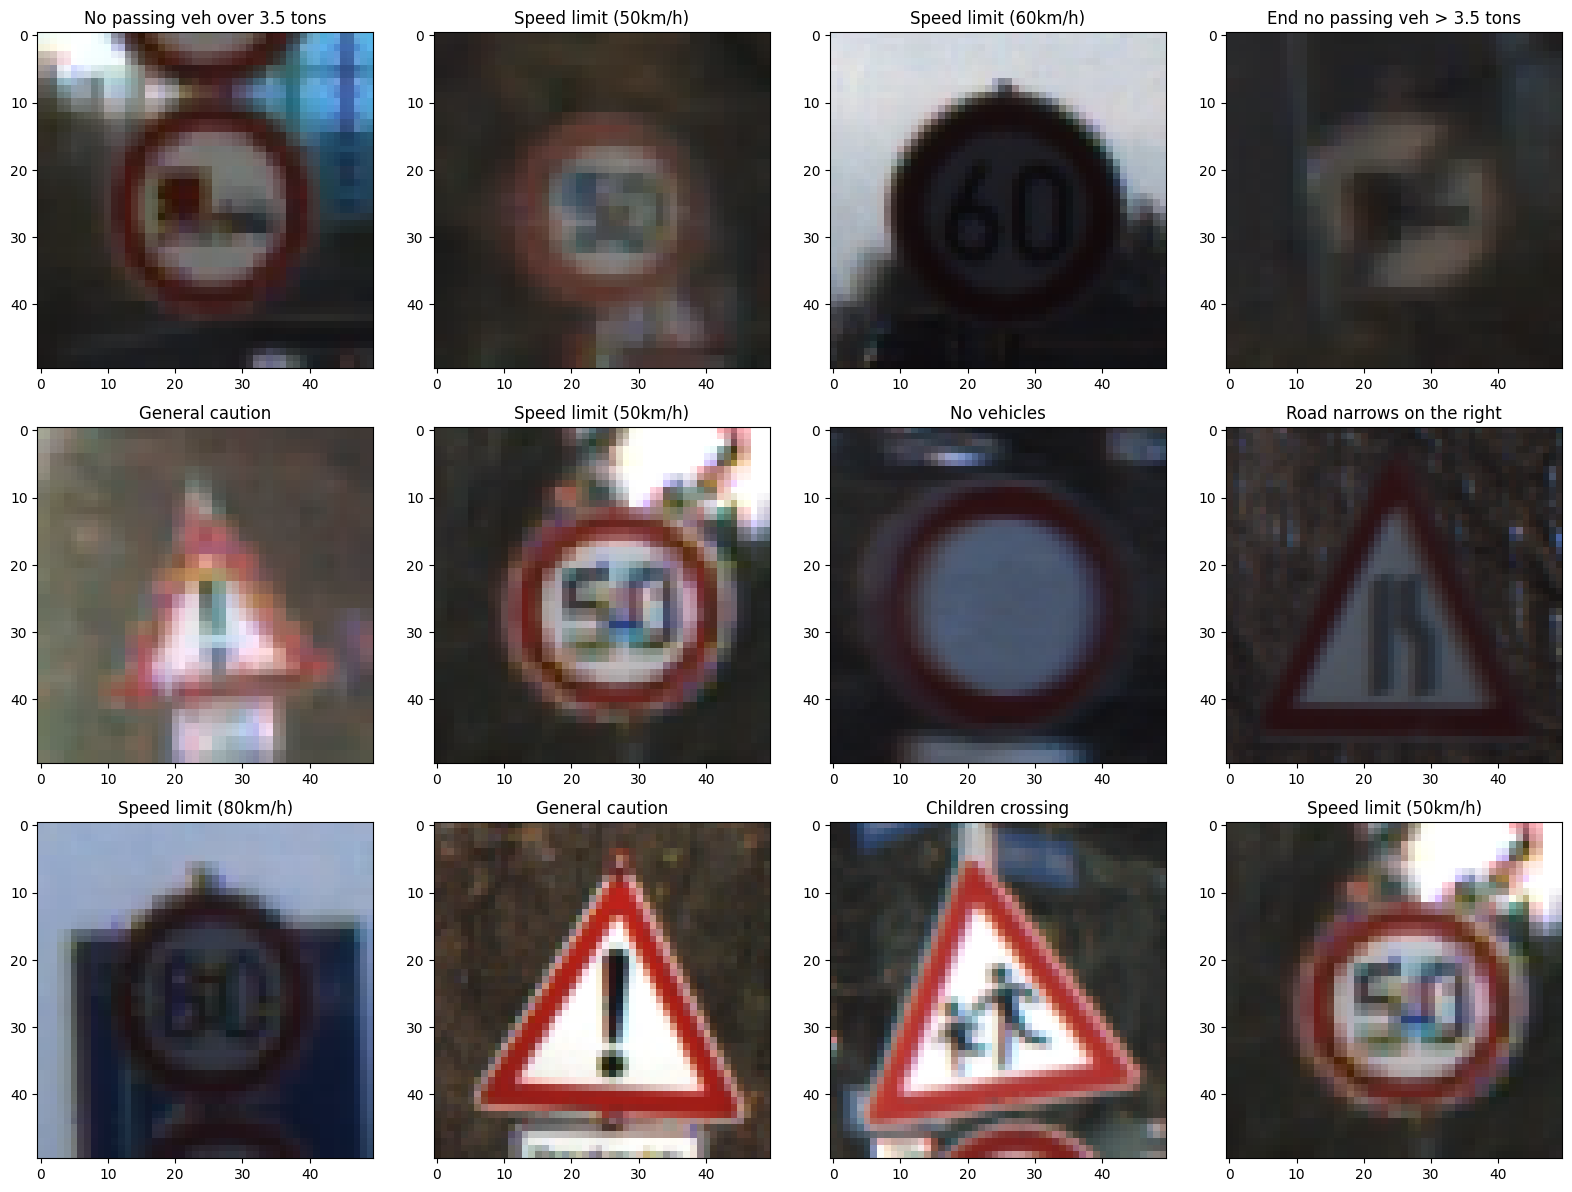

In [28]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = next(iter(train_dataset))
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

Convolutional Neural Network (CNN) Architecture
--

Using Keras' Sequential API, this code block constructs a Convolutional Neural Network (CNN) model.

__Tahers Work__

This CNN architecture consists of the following layers:
- __Convolutional Layers:__
Two convolutional layers with ReLU activation, kernel size of 5, and filters of 16 and 32. Input pictures size is of form (height, width, 3: which are already set) will sent into the first layer.
- __MaxPooling Layer:__
Using a pool size of (2, 2), the MaxPooling layer reduces computational complexity of the network and controlls overfitting.
- __Batch Normalization:__
After every convolutional layer, batch normalization is used to speed up and stabilize the training process.
- __Additional Convolutional Layers:__
Following two additional MaxPooling layers and Batch Normalization layers, there are two more convolutional layers with 64 filters, kernel sizes (3, 3), and ReLU activation. To avoid overfitting, a dropout layer with a dropout rate of 0.25 is introduced.
- __Flatten Layer:__
To transform the 2D feature maps into a 1D vector, which flattens the layer.
- **Dense(Fully Connected)Layers:**
ReLU activation and 512 neurons make up a dense layer. Batch normalization and dropout are used for regularization after that.
- __Output Layer__
The output layer for multiclass classification uses softmax activation and has 43 neurons, which corresponds to the number of traffic sign classes.

The purpose of this model architecture is to do picture classification tasks, specifically traffic sign recognition. The fully connected layers base their predictions on the hierarchical information that the convolutional layers have captured. For better generalization and regularization during training, batch normalization and dropout are added.(Shiyun Kong, 2023)

__Modification and Reason for Modification__

**Increased Depth:**

*   Tahers Model: Utilized two sets of convolutional layers
*   Modified Model: To improve the model's ability to extract organizational features from the data, a second set of convolutional layers(Shiyun Kong, 2023) (Conv2D) was added.

**Increased Complexity:**

*   Tahers Model: Using a model of small size with a limited quantity of convolutional layers.
*   Modified Model: In an effort to capture more complicated patterns in the photos of the traffic signs, extra convolutional layers were added to the model, increasing its complexity.

**Dropout Rate Adjustment:**

*   Tahers Model: Dropout rate set to 0.25 in specific layers.
*   Modified Model: For regularization, the dropout rate in some layers was changed to 0.5, which prevented overfitting and promoted generalization.

The modifications attempt to enhance and extend the model's learning ability, addressing the complexities of traffic sign identification and pushing for higher accuracy. The adjustments are made to improve performance on the traffic sign dataset by striking a balance between generalization and model complexity.(O. Keiron, 2015)

In [34]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'), #input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Dropout(rate=0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

Model Summary
--

The architecture and parameters of the specified neural network are summarized by the function "model.summary(),".

- __Model Architecture:__ Layers are added to the model in a sequential fashion since it is a sequential model.
- __Layers__: Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, and Dense layers make up the architecture
- __Output Shape__ : Every layer has a defined output.
- __Parameters__: Each layer's total number of weights and biases is displayed. Both teachable and untrainable.
- __Trainable and Non-trainable Parameters:__
Shows the total number of parameters as well as trainable and non-trainable parameters.

This overview helps us to understand the complex nature of the model by giving an overview of the amount of parameters and the layout of the neural network layers.

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model Compilation
--

The neural network model is assembled using certain training configurations in this code block.
- __Learning Rate:__
The learning rate(alpha) is set to 0.01. One hyperparameter that regulates the step size during optimization is the learning rate. While a smaller learning rate is often chosen to ensure a stable and smooth convergence. It also runs the risk of exceeding the ideal values.
- __Number of Epochs:__
There are fifteen epochs in all. One whole run through the whole training dataset is referred to as an epoch. The model may learn from the data across several iterations by training over multiple epochs.
- __Optimizer:__
The optimization process selects the Adam optimizer, which has a 0.01 learning rate. Adam is a well-liked optimization technique that may accelerate resolution by adjusting the learning rates for each parameter separately.
- __Model Compilation:__
Sets up the model for instruction. The optimizer, evaluation measure ('accuracy'), and loss function ('categorical_crossentropy' for multi-class classification) are all configured.

By defining how the model should learn from the data, what loss function to minimize, and what metrics to watch throughout training, this stage gets the model ready for training.(M. Sheng, 2018)

In [36]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model Training
--

- __Training Data__: The dataset that the fit function was trained on. The model is trained using this dataset.

- __Steps per Epoch:__ The number of training dataset steps (batches) that must be processed before going on to the following epoch. The training dataset's length is what it is configured to.

- __Number of Epochs:__ Total number of epochs during which the model is going to be trained.

- __Data Validation:__
The validation dataset used to assess the performance of the model at the end of every epoch.

- __Validation Steps:__ The number of steps (batches) to process from the validation dataset at the conclusion of each epoch will be decided by length of testting dataset.

- __Training History:__ Each epoch's training and validation loss and accuracy are recorded in the training history, which is kept in the history variable.

The training phase is started by this function, during which the model changes its weights, learns from the training data, and is assessed using the validation data. Analyzing the model's performance and possible over, or underfitting during training may be done with the help of the training history.(A. Krizhevsky, 2012)

In [39]:
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=10)

Epoch 1/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 61s 289ms/step - accuracy: 0.9894 - loss: 0.0347 - val_accuracy: 0.9767 - val_loss: 0.0945
Epoch 2/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9813 - val_loss: 0.0879
Epoch 3/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 65s 309ms/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9500 - val_loss: 0.2526
Epoch 4/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9527 - val_loss: 0.2144
Epoch 5/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 65s 308ms/step - accuracy: 0.9928 - loss: 0.0273 - val_accuracy: 0.9547 - val_loss: 0.1945
Epoch 6/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9531 - val_loss: 0.2071
Epoch 7/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 68s 325ms/step - accuracy: 0.9868 - loss: 0.0505 - val_accuracy: 0.9673 - val_loss: 0.1551
Epoch 8/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.00

CNN Model Performance Visualization
--

__Performance DataFrame:__
- performance = pd.DataFrame(mob_history.history): Converts the training history (loss and accuracy values for each epoch) into a Pandas DataFrame for easy plotting.

__Loss Plot:__
- ax[1].plot(performance[['loss', 'val_loss']]): Plots training and validation loss over epochs.
- ax[1].legend(['Training Loss', 'Validation Loss']): Adds a legend to the loss plot.
- ax[1].set_title('Model Loss'): Sets the title for the loss plot.
- ax[1].set_xlabel('Epochs'): Sets the x-axis label.
- ax[1].set_ylabel('Loss'): Sets the y-axis label.

__Accuracy Plot:__
- ax[0].plot(performance[['accuracy', 'val_accuracy']]): Plots training and validation accuracy over epochs.
- ax[0].legend(['Training Accuracy', 'Validation Accuracy']): Adds a legend to the accuracy plot.
- ax[0].set_title('Model Accuracy'): Sets the title for the accuracy plot.
- ax[0].set_xlabel('Epochs'): Sets the x-axis label.
- ax[0].set_ylabel('Accuracy'): Sets the y-axis label.

__Overall Title:__
- fig.suptitle('MobileNetV2 Performance'): Sets an overall title for the entire visualization.

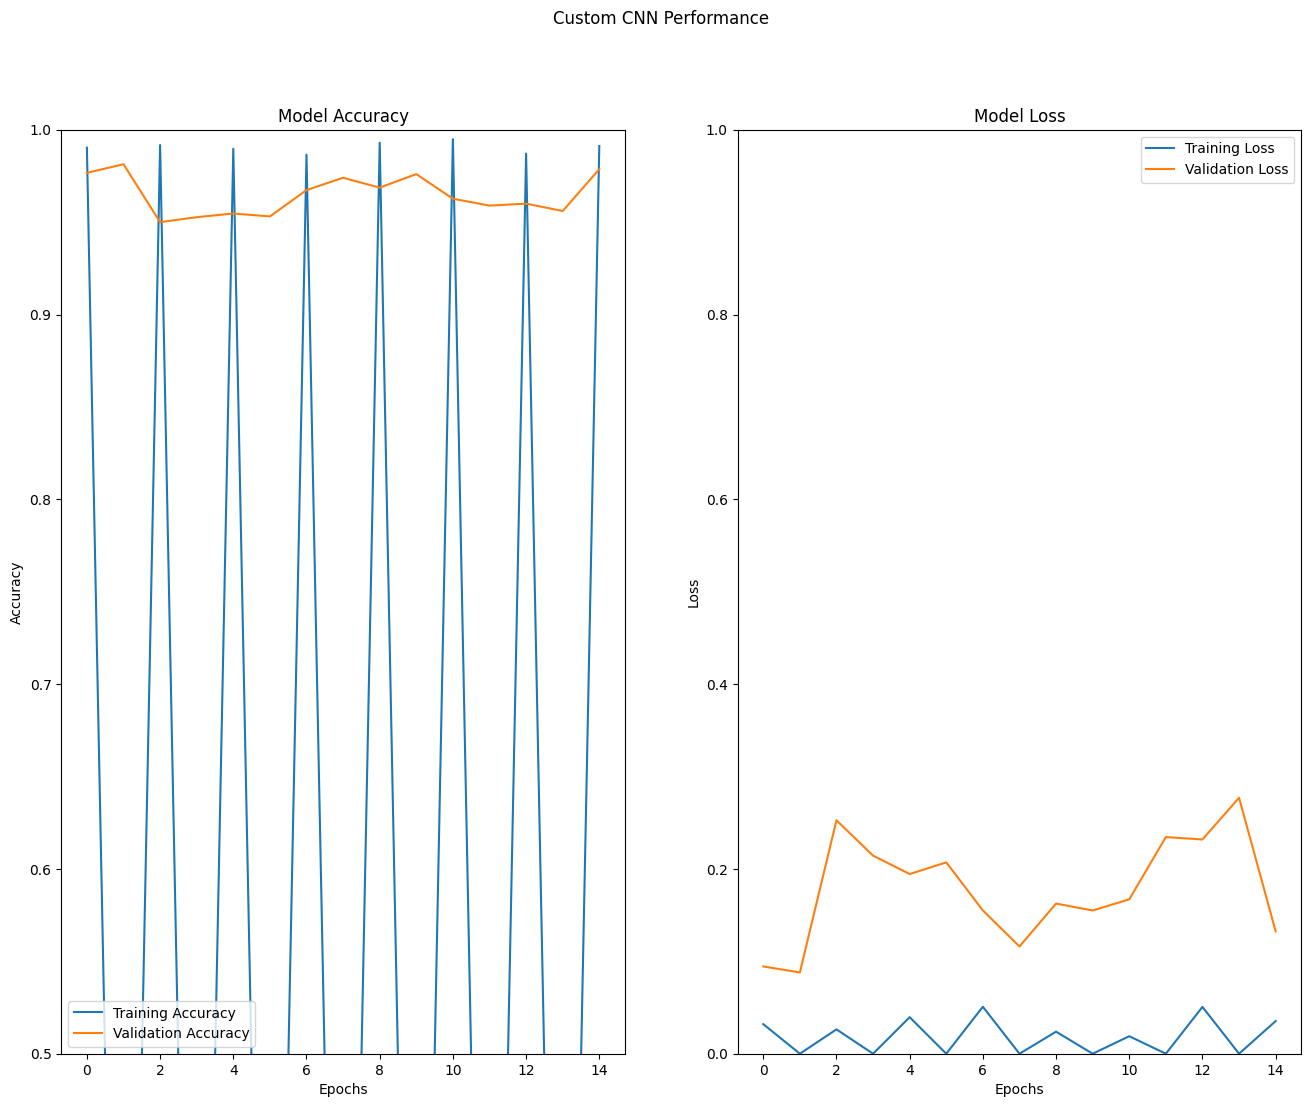

<Figure size 1000x700 with 0 Axes>

In [40]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

Saving the Custom CNN Model
--

With this line, the complete Custom CNN model including the weights, settings, and architecture is saved to a file called "CNN.h5." It is usual practice to save models in the Hierarchical Data Format (HDF5) using the ".h5" extension.

In [42]:
model.save("CNN.keras")

Preparing Test Data for Evaluation
--

__Tahers Work__

- Using the class indices keys that were acquired from the training dataset, the map_pred function associates predicted class indices with the labels of the associated traffic signs.
- Reads data from a CSV file (Test.csv) containing the test dataset.
- Takes the picture paths and class labels out of the dataset.
- Every image is received, converted to RGB format, resized to the correct size, and then appended to the data list iteratively.
- Divides by 255 to normalize the pixel values to fall within [0, 1] after converting the data list to a NumPy array.

This code block configures the test data and offer a way to evaluate the expected indices by mapping them back to the labels of the associated traffic signs.

__Modification and Reason for Modification__

**Dataset Source:**
* Taher's Approach: Utilized the 'Test.csv' file from the original dataset.
* Modified Approach: For testing, we changed it to the 'GT-final_test.csv' file as we had taken the input data from a shared tutorial.

**CSV File Structure:**
* Taher's Approach: Assumed a specific structure in the CSV file.
* Modified Approach: The format of 'GT-final_test.csv,' which uses a different delimiter (';'), required adjustments to the CSV file reading.

**Image Path Handling:**
* Taher's Approach: 'Path' column in the CSV file was used to construct the picture paths.
* Modified Approach: created picture paths that reflected modifications to the test dataset's file structure by using the 'Filename' column as a guide.

**Image Reading Path:**
* Taher's Approach: Read images from the 'data_dir.'
* Modified Approach: Take pictures from 'test_path,' which we changed since we are keeping the path to the photographs in this variable under "Data Directories and Image Dimensions."

The purpose of these changes is to guarantee that the structure of the updated test dataset and the test data processing procedure work together flawlessly. For a more accurate and representative assessment of the model's performance, adjustments are performed in response to modifications in the source, structure, and organization of the dataset.

In [62]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]

test_df = pd.read_csv(data_dir + 'Test.csv',delimiter=',')

test_labels = test_df["ClassId"].values
imgs = test_df["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(test_path +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

Error in Test/00000.png
Error in Test/00001.png
Error in Test/00002.png
Error in Test/00003.png
Error in Test/00004.png
Error in Test/00005.png
Error in Test/00006.png
Error in Test/00007.png
Error in Test/00008.png
Error in Test/00009.png
Error in Test/00010.png
Error in Test/00011.png
Error in Test/00012.png
Error in Test/00013.png
Error in Test/00014.png
Error in Test/00015.png
Error in Test/00016.png
Error in Test/00017.png
Error in Test/00018.png
Error in Test/00019.png
Error in Test/00020.png
Error in Test/00021.png
Error in Test/00022.png
Error in Test/00023.png
Error in Test/00024.png
Error in Test/00025.png
Error in Test/00026.png
Error in Test/00027.png
Error in Test/00028.png
Error in Test/00029.png
Error in Test/00030.png
Error in Test/00031.png
Error in Test/00032.png
Error in Test/00033.png
Error in Test/00034.png
Error in Test/00035.png
Error in Test/00036.png
Error in Test/00037.png
Error in Test/00038.png
Error in Test/00039.png
Error in Test/00040.png
Error in Test/00

Model Evaluation on Test Data
--

__Making Predictions:__
- pred = model.predict(X_test): Uses the trained model to predict class probabilities for the test data.

__Mapping Predictions:__
- pred = map_pred(pred.argmax(axis=-1)): Maps the predicted class indices to their corresponding traffic sign labels using the previously defined map_pred function.

__Accuracy Calculation:__
- accuracy_score(test_labels, pred) * 100: Calculates the accuracy of the model's predictions on the test data using scikit-learn's accuracy_score function.

__Print Accuracy:__
- print('Test Data accSuracy: ', accuracy_score(test_labels, pred) * 100): Prints the accuracy of the model on the test data.

The model may customize the final layers for the purpose of traffic sign categorization while utilizing the information from ImageNet by employing a pre-trained MobileNetV2 as a feature extractor.

In [63]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


ValueError: math domain error

Visualization of Model Predictions on Validation Data
--

__Validation Batch:__
- val_images, val_labels = test_dataset.next(): Retrieves a batch of validation images and labels from the test dataset.

__Predictions:__
- predicted = model.predict(val_images): Uses the trained model to predict class probabilities for the validation batch.
- predicts = map_pred(np.argmax(predicted, axis=-1)): Maps the predicted class indices to traffic sign labels using the map_pred function.
- labels = map_pred(np.argmax(val_labels, axis=-1)): Maps the true class indices to traffic sign labels.

__Visualization in Subplot Grid:__
- Generates a 3x4 subplot grid to display images along with their actual and predicted labels.
- If the prediction is correct, the title is displayed in green. If predicted incorrectly, it will be displayed in red.

With the use of this visualization, we may can evaluate the model's performance on specific photos from the validation dataset and get insight into both its advantages and disadvantages.

5/5 [==============================] - 0s 4ms/step


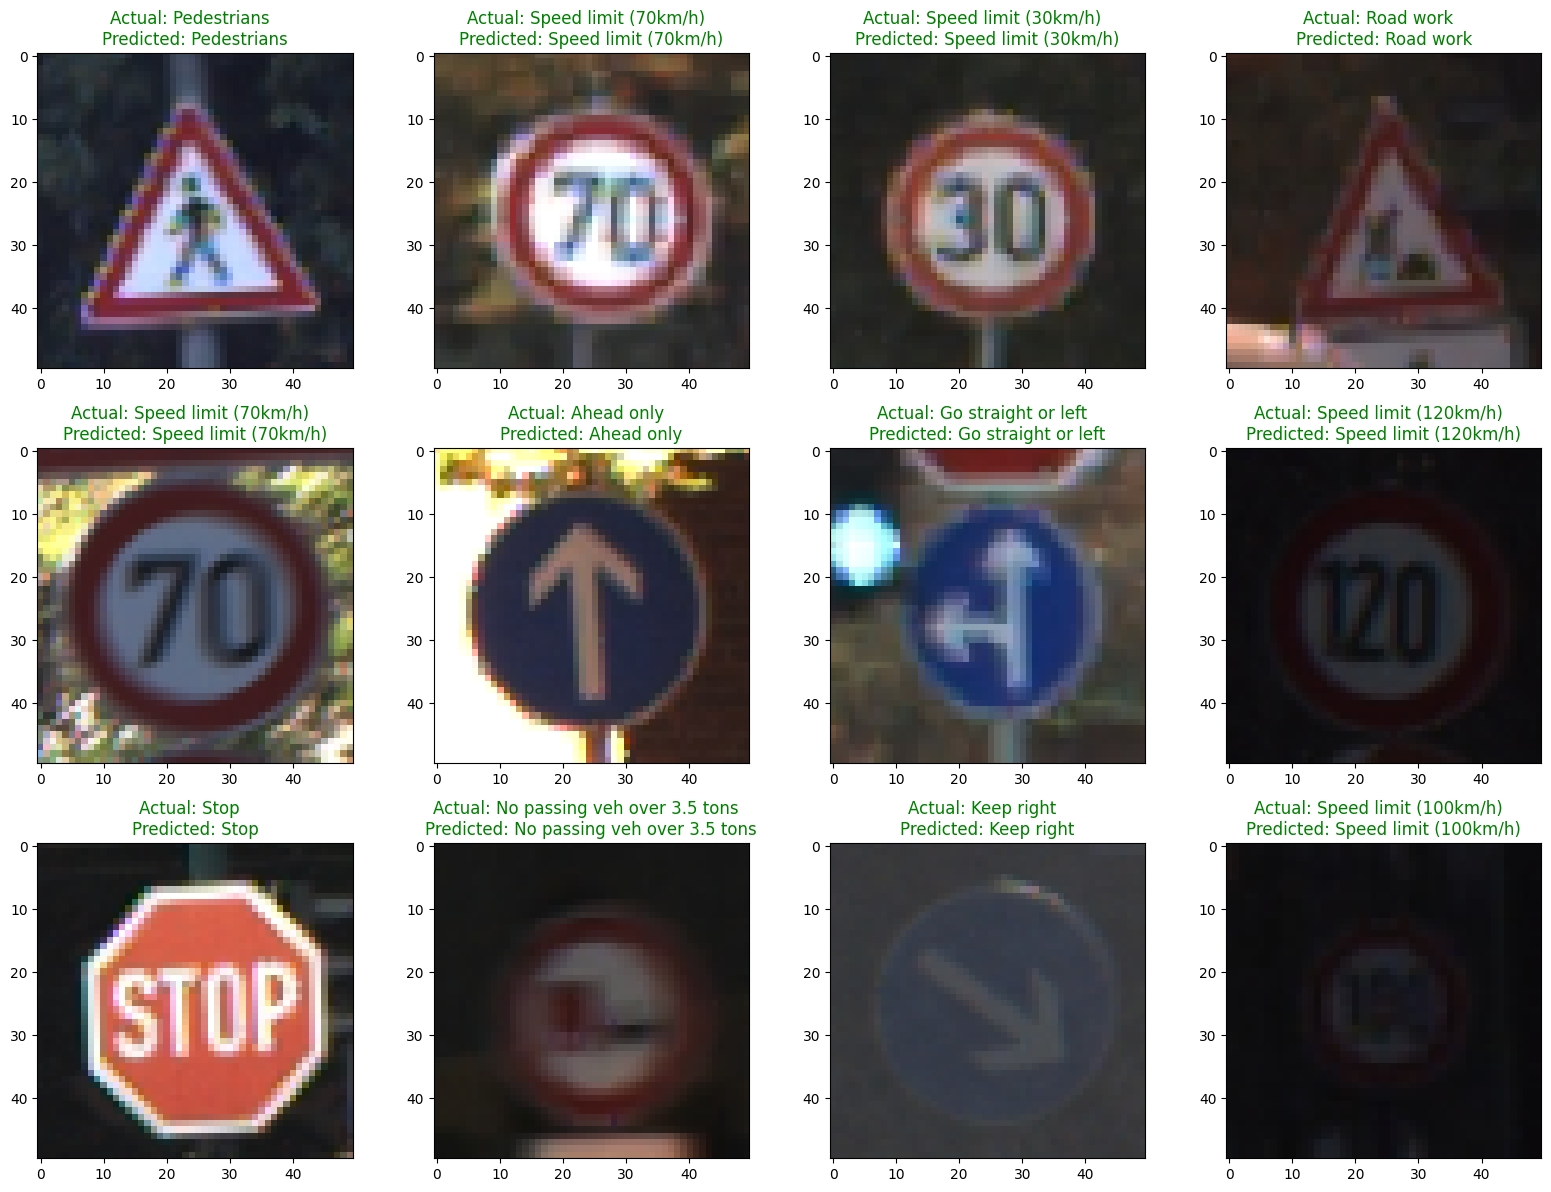

In [ ]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()

Loading InceptionV3 Pre-trained Model
--

__InceptionV3 Model Initialization:__
- Using the *InceptionV3* class from Keras's applications module, the code initializes the pre-trained InceptionV3 model.
- *weights='imagenet*: Indicates that weights that have already been learned on the ImageNet dataset should be put into the model.
- *include_top=False:* Excludes the top layers of the model, which are completely integrated, as we want to add customized layers for traffic sign detection.
- *input_shape=(inception_height, inception_width, 3):* Specifies the form of the input photos that the model expects. It is set to (75, 75, 3) in this instance.

__Freezing Pre-trained Layers:__
- *base_model.trainable = False:* Freezes the InceptionV3 model's pre-trained layers' weights. This implies that only the custom layers that are introduced later will be trained, and these layers will not be modified throughout the training process.

This code block uses InceptionV3 as a feature extractor and prevents the alteration of its pre-trained weights, laying the groundwork for the transfer learning process.

In [ ]:
# Load InceptionV3 pre-trained on ImageNet
inception_height = 75
inception_width = 75
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(inception_height, inception_width, 3))
base_model.trainable = False

InceptionV3-Based Model Architecture
--

__Sequential Model Composition:__
- *incept_model = tf.keras.Sequential([...]):* Using the Keras Sequential API, defines a sequential model in which layers are added one after the other.

__InceptionV3 Base Model Inclusion:__
- *base_model:* The basis model is the InceptionV3 model that was loaded in the previous code block. By extracting structural characteristics from input photos, this model functions as a feature extractor.

__Global Average Pooling Layer:__
- *keras.layers.GlobalAveragePooling2D():* Over the input feature map's dimensions, it performs global average pooling. By reducing all of the dimensions to a 1x1 scale, the obtained characteristics are efficiently summarized.

__Dropout Layer:__
- *keras.layers.Dropout(0.5):* introduces dropout regularization at a rate of 0.5, which prevents overfitting by randomly assigning a portion of input units to zero during training.

__Dense Layer (Hidden Layer):__
- *keras.layers.Dense(256, activation='relu'):* Includes a 256-unit densely linked layer with a ReLU activation function. The global average pooling's summary characteristics are processed in this layer.

__Batch Normalization Layer:__
- *keras.layers.BatchNormalization():* Improves training stability and speeds up convergence by normalizing and scaling the hidden layer activations.

__Dropout Layer (Regularization):__
- *keras.layers.Dropout(rate=0.3):* Introduces more dropout regularization to the model at a rate of 0.3 in order to mitigate overfitting.

__Dense Layer (Output Layer):__
- *keras.layers.Dense(43, activation='softmax'):* Generates class probabilities by defining the output layer with 43 units—one for each type of traffic sign—and the softmax activation function.

__Model Summary:__
- *incept_model.summary():* Gives an overview of the model architecture, displaying the number of trainable parameters, the overall number of parameters, and the kinds and forms of each layer.

The InceptionV3-based model architecture for traffic sign identification is put together by this code block, which adds custom layers to the pre-trained InceptionV3 basis.

In [ ]:
incept_model = tf.keras.Sequential([base_model,
                                   keras.layers.GlobalAveragePooling2D(),
                                   keras.layers.Dropout(0.5),
                                   keras.layers.Dense(256, activation='relu'),
                                   keras.layers.BatchNormalization(),
                                   keras.layers.Dropout(rate=0.3),
                                   keras.layers.Dense(43, activation='softmax')
                                ])
incept_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization_100 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                                 
 dropout_7 (Dropout)         (None, 256)              

Image Data Generation for Training and Testing
--

__Image Data Generators:__
- *train_datagen* and *test_datagen:*  Instances of *ImageDataGenerator* from Keras, used for real-time data augmentation during training.

__Data Rescaling:__
- *rescale=1./255:* Adjusts picture pixel values to fall between [0, 1]. During training, normalizing the data facilitates convergence.

__Validation Split:__
- *validation_split=0.2:* Indicates a 20% validation split for the training dataset.

__Flow from Directory:__
- *flow_from_directory:* Generates batches of augmented/normalized data from image files in a directory.
- *train_path:* Path to the directory containing the training images.
- *target_size=(inception_height, inception_width):* Resizes images to the specified height and width.
- *batch_size:* Number of samples per batch.
- *class_mode='categorical':* Utilizes categorical encoding for class labels.
- *shuffle=True:* Shuffles the data at the end of each epoch.
- *seed:* Seed for randomization to ensure reproducibility.
- *color_mode='rgb':* Specifies RGB color mode for the images.
- *interpolation='hamming':* Interpolation method for resizing.

__Subset for Training and Validation:__
- *subset='training* and *subset='validation:* Split the dataset into subgroups for training and validation according on the given split.

In order to enable successful and efficient learning, these generators are essential for providing batches of augmented and normalized pictures to the model during training and validation.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(inception_height, inception_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(inception_height, inception_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


Model Compilation and Training Configuration
--

__Learning Rate and Epochs Configuration:__
- *alpha = 0.001:* Sets the speed at which the Adam optimizer learns. During optimization, the step size is determined by the learning rate.
- *epochs = 15:* Specifies how many training epochs there are. One whole run through the whole training dataset is referred to as an epoch.

__Adam Optimizer Initialization:__
- *optim = keras.optimizers.Adam(learning_rate=alpha):* Sets the learning rate at which the Adam optimizer is initialized.

__Model Compilation:__
- *incept_model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy']):* Compiles the model for training.
- *optimizer:* The configured Adam optimizer.
- *loss='categorical_crossentropy':* Categorical crossentropy is chosen as the loss function for multi-class classification problems.
- *metrics=['accuracy']:* During training and evaluation, accuracy is used as a metric to monitor the model's performance.

This code block configures the optimizer, loss function, and evaluation metric, readying the model for training. Model performance and the training process are affected by the chosen learning rate and number of epochs.

In [ ]:
alpha=0.001
epochs=15
optim = keras.optimizers.Adam(learning_rate=alpha)
incept_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model Training
--

__Model Training Process:__
- *incept_model.fit(...):* Initiates the training process for the compiled InceptionV3-based model.
train_dataset: The generator providing batches of training data.
- *steps_per_epoch=len(train_dataset):* Specifies the number of steps (batches) to be processed in each epoch. It is set to the length of the training dataset divided by the batch size.
- *epochs=15:* The number of complete passes through the training dataset during training.
validation_data=test_dataset: The generator providing batches of validation data during training.
validation_steps=len(test_dataset): Specifies the number of steps (batches) to be processed from the validation dataset in each epoch. It is set to the length of the validation dataset divided by the batch size.

__Training Output:__
- The training process produces the *incept_history* object, which contains information about the training and validation performance over epochs.

Using the designated generators for training and validation datasets, this code block is in charge of training the InceptionV3-based model. The *incept_history* object stores the training progress and performance indicators for further analysis and display.

In [ ]:
incept_history = incept_model.fit(train_dataset,
                            steps_per_epoch=len(train_dataset),
                            epochs=epochs,
                            validation_data=test_dataset,
                            validation_steps=len(test_dataset))

Epoch 1/15
210/210 [==============================] - 32s 125ms/step - loss: 2.0331 - accuracy: 0.4275 - val_loss: 1.6151 - val_accuracy: 0.5170
Epoch 2/15
210/210 [==============================] - 26s 122ms/step - loss: 1.3704 - accuracy: 0.5749 - val_loss: 1.5714 - val_accuracy: 0.5183
Epoch 3/15
210/210 [==============================] - 24s 114ms/step - loss: 1.2047 - accuracy: 0.6142 - val_loss: 1.5204 - val_accuracy: 0.5467
Epoch 4/15
210/210 [==============================] - 27s 127ms/step - loss: 1.1139 - accuracy: 0.6408 - val_loss: 1.4790 - val_accuracy: 0.5493
Epoch 5/15
210/210 [==============================] - 24s 115ms/step - loss: 1.0537 - accuracy: 0.6587 - val_loss: 1.4675 - val_accuracy: 0.5531
Epoch 6/15
210/210 [==============================] - 37s 174ms/step - loss: 0.9960 - accuracy: 0.6737 - val_loss: 1.4762 - val_accuracy: 0.5475
Epoch 7/15
210/210 [==============================] - 24s 113ms/step - loss: 0.9537 - accuracy: 0.6856 - val_loss: 1.5007 - val_ac

InceptionV3-Based Model Performance Visualization
--

__Subplots Initialization:__
- *fig, ax = plt.subplots(1, 2):* Initializes a figure with one row and two columns of subplots.
- *fig.set_size_inches(16, 12):* Sets the size of the figure.

__Performance DataFrame:__
- *performance = pd.DataFrame(incept_history.history):* Converts the training history of the InceptionV3 model into a Pandas DataFrame for easy manipulation.

__Loss Plotting:__
- *ax[1].plot(performance[['loss', 'val_loss']]):* Plots the training loss and validation loss over epochs.
- *ax[1].legend(['Training Loss', 'Validation Loss']):* Adds a legend to the subplot.
- *ax[1].set_title('InceptionV3 Model Loss'):* Sets the title for the loss subplot.
- *ax[1].set_xlabel('Epochs') and ax[1].set_ylabel('Loss'):* Sets labels for the x-axis and y-axis, respectively.

__Accuracy Plotting:__
- *ax[0].plot(performance[['accuracy', 'val_accuracy']]):* Plots the training accuracy and validation accuracy over epochs.
- *ax[0].legend(['Training Accuracy', 'Validation Accuracy']):* Adds a legend to the subplot.
- *ax[0].set_title('InceptionV3 Model Accuracy'):* Sets the title for the accuracy subplot.
- *ax[0].set_xlabel('Epochs') and ax[0].set_ylabel('Accuracy'):* Sets labels for the x-axis and y-axis, respectively.

__Figure Title:__
- *fig.suptitle('InceptionV3 Performance'):* Sets the overall title for the entire figure.

__Displaying the Plots:__
- *plt.show():* Displays the figure with the subplots, showing the training and validation performance of the InceptionV3-based model.

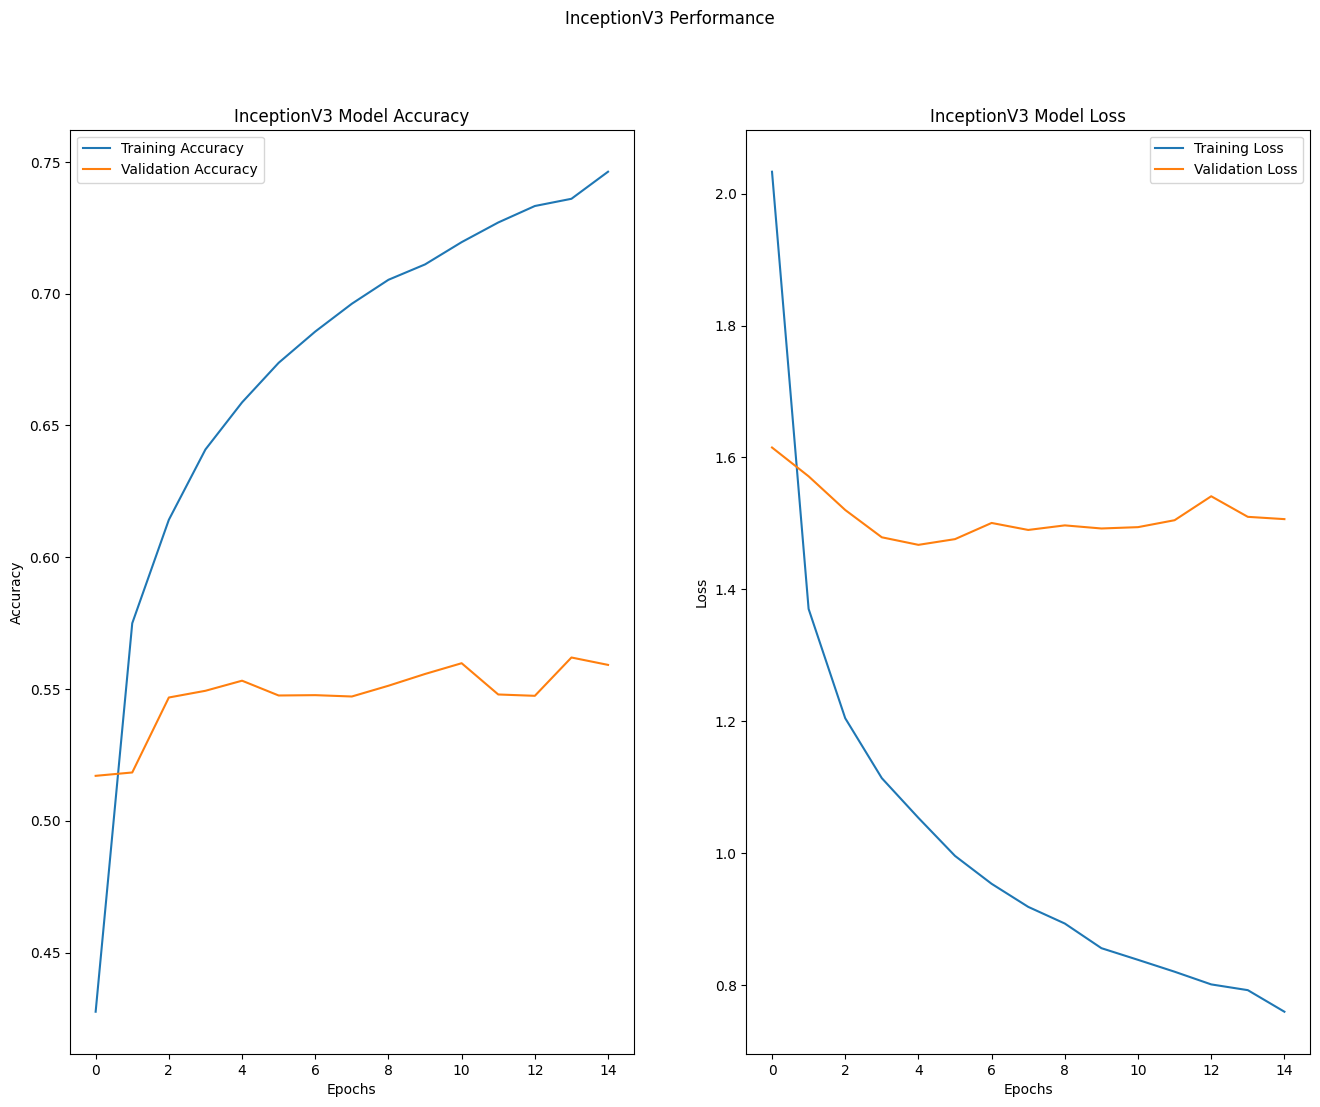

<Figure size 1000x700 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(incept_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('InceptionV3 Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
# ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('InceptionV3 Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
# ax[0].set_ylim(0.5,1)
fig.suptitle('InceptionV3 Performance')
plt.show()

Saving the InceptionV3-Based Model
--

__Model Saving:__
- *incept_model.save("InceptionV3.h5"):* Creates a file called "InceptionV3.h5" in the current working directory, where the trained InceptionV3-based model is saved.

__HDF5 Format:__
- The model is saved in the Hierarchical Data Format (HDF5), a file format that is frequently used to store vast volumes of numerical data, as shown by the *.h5* suffix.

After training, this code block is in charge of storing the InceptionV3-based model that has been learned. Later on, the stored model file may be imported for additional fine-tuning or inference.

In [ ]:
incept_model.save("InceptionV3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Mapping Predictions for InceptionV3 Model
--

__Function for Mapping Predictions:__

__def map_pred_inception(pred):__ Defines a function to map predicted class indices to their corresponding traffic sign labels for the InceptionV3 model

__Loading Test Data for Inference:__

test_df = pd.read_csv(data_dir + 'GT-final_test.csv', delimiter=*';'): Reads the test dataset CSV file containing information about the test images.

test_labels = test_df["ClassId"].values: Extracts the true class labels of the test images.
imgs = test_df["Filename"].*values: Extracts the filenames of the test images.

__Processing Test_Images:__

A loop iterates over the test image filenames.
image = cv2.imread(test_path + img): Reads the image using OpenCV.
image_fromarray = Image.fromarray(image, 'RGB'): Converts the image from NumPy array format to a PIL Image in RGB mode.
resize_image = image_fromarray.resize((inception_height, inception_width)): Resizes the image to the input dimensions expected by the InceptionV3 model.
data_inception.append(np.array(resize_image)): Appends the processed image as a NumPy array to the data_inception list.

__Data_Normalization:__

X_test_incept = np.array(data_inception): Converts the list of processed images to a NumPy array.
X_test_incept = X_test_incept / 255: Normalizes the pixel values of the images.

The test data is ready for analyzing using the trained InceptionV3-based model. It analyzes the test pictures, normalizes the pixel values for inference, and reads the information from the test dataset. the range [0, 1].

In [ ]:
def map_pred_inception(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
test_df = pd.read_csv(data_dir + 'GT-final_test.csv',delimiter=';')

test_labels = test_df["ClassId"].values
imgs = test_df["Filename"].values

data_inception =[]

for img in imgs:
    try:
        image = cv2.imread(test_path +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((inception_height, inception_width))
        data_inception.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test_incept = np.array(data_inception)
X_test_incept = X_test_incept/255

Evaluating InceptionV3-Based Model on Test Data
--

__Importing Necessary Library:__
- *from sklearn.metrics import accuracy_score:* Imports the accuracy_score function from scikit-learn, which will be used to calculate the accuracy of the model.

__Model Inference:__
- *pred_incept = incept_model.predict(X_test_incept):* Performs predictions on the preprocessed test data using the trained InceptionV3-based model.

__Mapping Predictions:__
- *pred_incept = map_pred_inception(pred_incept.argmax(axis=-1)):* Maps the predicted class indices to their corresponding traffic sign labels using the defined map_pred_inception function.

__Accuracy Calculation:__
- *(accuracy_score(test_labels, pred_incept) * 100):* Calculates the accuracy of the model on the test data by comparing the true labels (test_labels) with the predicted labels (pred_incept). The result is multiplied by 100 to express the accuracy in percentage.

__Print Accuracy:__
- *print('Test Data accuracy: ', accuracy_score(test_labels, pred_incept) * 100):* Prints the accuracy of the InceptionV3-based model on the test data.

This code block publishes the accuracy score after assessing the trained InceptionV3-based model's performance on the test dataset.

In [ ]:
from sklearn.metrics import accuracy_score
pred_incept = incept_model.predict(X_test_incept)
pred_incept = map_pred_inception(pred_incept.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred_incept)*100)

395/395 [==============================] - 7s 14ms/step
Test Data accuracy:  50.475059382422806


MobileNetV2 as Base Model
--

__MobileNetV2:__
- This part of code will initializes the MobileNetV2 model provided by TensorFlow.keras for transfer learning. and take the Input shapes which will height, width and color.

__Input Shape__
- input_shape=(height, width, 3): gives the predicted input shape for the MobileNetV2 model based on the selected width and height. When using RGB color photos, the final dimension is set to 3.

__Include Top:__
- include_top=False: omits the fully linked layers at the top of the MobileNetV2 architecture, as bespoke layers designed for the particular purpose will take their place.

__Weights:__
- weights="imagenet": Loads pre-trained weights from ImageNet. This provides a starting point for the model's parameters.

__Freezing Layers:__
- base_model.trainable = False: sets all of the layers' weights in the MobileNetV2 base model to zero. This implies that just the weights of the newly added custom layers will be trained during fine-tuning, and that these weights will not be modified.

The model may use the expertise from ImageNet by employing an pre-trained MobileNetV2 as a feature extractor, and then tailor the final layers to the particular goal of traffic sign categorization.

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (height, width, 3), include_top = False, weights = "imagenet")
base_model.trainable = False

MobileNetV2-Based Model Architecture
--

__Sequential Model:__
- tf.keras.Sequential: Initializes a Sequential model, where layers are added sequentially.

__MobileNetV2 Base Model:__
- base_model: The pre-trained MobileNetV2 model serves as the base model.

__Global Average Pooling Layer:__
- keras.layers.GlobalAveragePooling2D(): Reduces the spatial dimensions of the output from the base model by taking the global average.

__Dropout Layer:__
- keras.layers.Dropout(0.2): Introduces dropout regularization with a dropout rate of 0.2 to prevent overfitting.

__Dense Layer (Hidden):__
- keras.layers.Dense(512, activation='relu'): Adds a dense layer with 512 neurons and ReLU activation.

__Batch Normalization Layer:__
- keras.layers.BatchNormalization(): Applies batch normalization to stabilize and accelerate the training process.

__Dropout Layer (Regularization):__
- keras.layers.Dropout(rate=0.2): Another dropout layer to further prevent overfitting.

__Dense Layer (Output):__
- keras.layers.Dense(43, activation='softmax'): The output layer with 43 neurons and softmax activation for multiclass classification (43 traffic sign classes).

__Model Summary:__
- mob_model.summary(): Displays a summary of the model architecture, including the number of parameters.

For task-specific fine-tuning, this model adds further layers to the MobileNetV2 architecture. Prior to adding the custom dense layers, the spatial dimensions are decreased using the global average pooling layer. For regularization and stability throughout training, batch normalization and dropout are incorporated.

In [ ]:
mob_model = tf.keras.Sequential([base_model,
                                   keras.layers.GlobalAveragePooling2D(),
                                   keras.layers.Dropout(0.2),
                                   keras.layers.Dense(512, activation='relu'),
                                   keras.layers.BatchNormalization(),
                                   keras.layers.Dropout(rate=0.2),
                                   keras.layers.Dense(43, activation='softmax')
                                ])
mob_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization_99 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                      

Model Compilation for MobileNetV2-Based Model
--

__Learning Rate:__
- alpha = 0.01: The learning rate is set to 0.01. The learning rate controls the step size during optimization.

__Number of Epochs:__
- epochs = 8: The model will be trained for 8 epochs.

__Optimizer:__
- optim = keras.optimizers.Adam(learning_rate=alpha): For optimization using the given learning rate, the Adam optimizer is selected.

__Model Compilation:__
- mob_model.compile: Sets up the model for instruction. The optimizer, evaluation measure ('accuracy'), and loss function ('categorical_crossentropy' for multi-class classification) are all configured.

By defining how the model should learn from the data, what loss function to minimize, and what metrics to watch during training, this stage gets the MobileNetV2-based model ready for training.

In [ ]:
alpha=0.01
epochs=8
optim = keras.optimizers.Adam(learning_rate=alpha)
mob_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Training MobileNetV2-Based Model
--

__Training Data:__
- train_dataset: The training dataset provided to the fit function.

__Steps per Epoch:__
- steps_per_epoch=len(train_dataset): The number of training dataset steps (batches) that must be processed before going on to the next epoch. The training dataset's length is what it is configured to.

__Number of Epochs:__
- epochs=8: The total number of epochs for which the model will be trained.

__Validation Data:__
- test_dataset: The validation dataset that was used to assess the model's effectiveness at the end of each epoch.

__Validation Steps:__
- validation_steps=len(test_dataset): The quantity of steps (batches) that must be processed at the conclusion of each epoch from the validation dataset.

__Training History:__
- mob_history: Keeps track of the training history, including the accuracy and loss figures for every epoch.

This function starts the MobileNetV2-based model's training process. During each epoch, the model gains knowledge from the training data and is assessed using the validation data. The training log is kept on file for future review.

In [ ]:
mob_history = mob_model.fit(train_dataset,
                          steps_per_epoch=len(train_dataset),
                          epochs=epochs,
                          validation_data=test_dataset,
                          validation_steps=len(test_dataset))

Epoch 1/8
210/210 [==============================] - 44s 180ms/step - loss: 1.3653 - accuracy: 0.5891 - val_loss: 2.0791 - val_accuracy: 0.4656
Epoch 2/8
210/210 [==============================] - 20s 94ms/step - loss: 0.8588 - accuracy: 0.7179 - val_loss: 2.0295 - val_accuracy: 0.4706
Epoch 3/8
210/210 [==============================] - 21s 99ms/step - loss: 0.7249 - accuracy: 0.7566 - val_loss: 2.2053 - val_accuracy: 0.4601
Epoch 4/8
210/210 [==============================] - 23s 108ms/step - loss: 0.6317 - accuracy: 0.7869 - val_loss: 2.1790 - val_accuracy: 0.4828
Epoch 5/8
210/210 [==============================] - 21s 98ms/step - loss: 0.5616 - accuracy: 0.8108 - val_loss: 2.3036 - val_accuracy: 0.4737
Epoch 6/8
210/210 [==============================] - 21s 98ms/step - loss: 0.5361 - accuracy: 0.8187 - val_loss: 2.2701 - val_accuracy: 0.4743
Epoch 7/8
210/210 [==============================] - 20s 96ms/step - loss: 0.4911 - accuracy: 0.8337 - val_loss: 2.3213 - val_accuracy: 0.46

MobileNetV2-Based Model Performance Visualization
--

__Performance DataFrame:__
- performance = pd.DataFrame(mob_history.history): Converts the training history (loss and accuracy values for each epoch) into a Pandas DataFrame for easy plotting.

__Loss Plot:__
- ax[1].plot(performance[['loss', 'val_loss']]): Plots training and validation loss over epochs.
- ax[1].legend(['Training Loss', 'Validation Loss']): Adds a legend to the loss plot.
- ax[1].set_title('Model Loss'): Sets the title for the loss plot.
- ax[1].set_xlabel('Epochs'): Sets the x-axis label.
- ax[1].set_ylabel('Loss'): Sets the y-axis label.

__Accuracy Plot:__
- ax[0].plot(performance[['accuracy', 'val_accuracy']]): Plots training and validation accuracy over epochs.
- ax[0].legend(['Training Accuracy', 'Validation Accuracy']): Adds a legend to the accuracy plot.
- ax[0].set_title('Model Accuracy'): Sets the title for the accuracy plot.
- ax[0].set_xlabel('Epochs'): Sets the x-axis label.
- ax[0].set_ylabel('Accuracy'): Sets the y-axis label.

__Overall Title:__
- fig.suptitle('MobileNetV2 Performance'): Sets an overall title for the entire visualization.

These charts show how effectively the MobileNetV2-based model generalizes to unknown validation data across the training epochs and how well it learns from the training data.

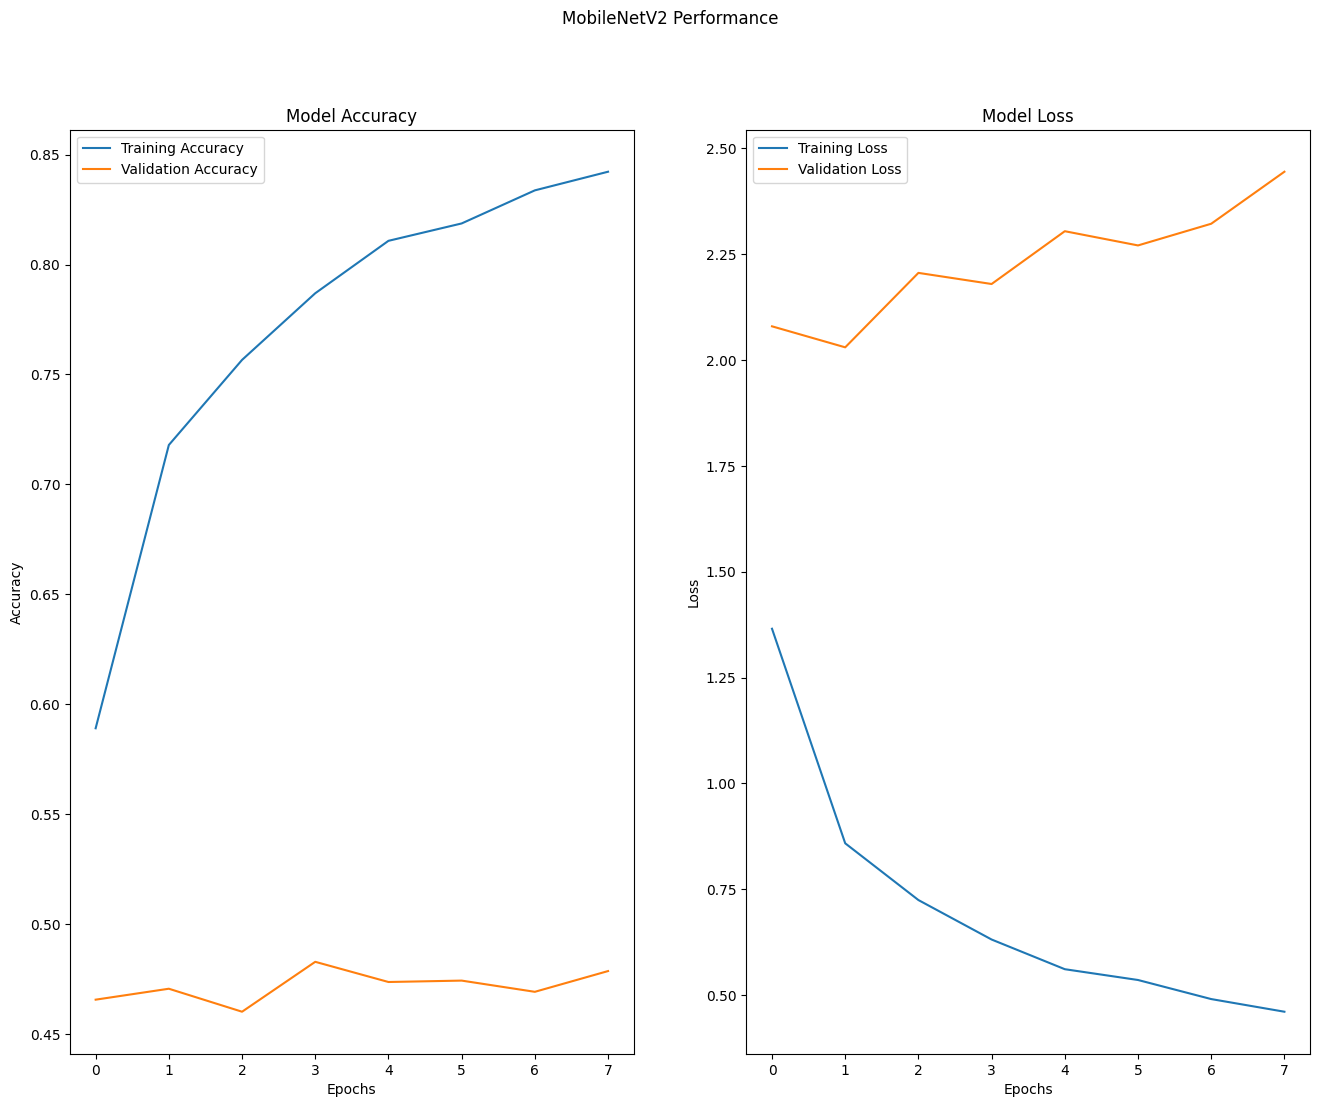

<Figure size 1000x700 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(mob_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
# ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
# ax[0].set_ylim(0.5,1)
fig.suptitle('MobileNetV2 Performance')
plt.show()

MobileNetV2-Based Model Evaluation on Test Data
--

__Making Predictions:__
- The trained MobileNetV2-based model is used to forecast test data's class probabilities.

__Mapping Predictions:__
- Uses the map_pred function to map the anticipated class indices to the labels of the associated traffic signs.

__Accuracy Calculation:__
- Calculates the accuracy_score function from scikit-learn for the MobileNetV2-based model's predictions on the test data.

__Print Accuracy:__
- Prints the accuracy of the model on the test data.

This offers an assessment measure to evaluate the performance of the MobileNetV2-based model using test data that hasn't been seen before. The accuracy score shows what proportion of traffic sign labels were properly predicted.

In [ ]:
from sklearn.metrics import accuracy_score
pred = mob_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 4s 7ms/step
Test Data accuracy:  37.86223277909739


VGG19-Based Model Architecture
--

__Sequential Model:__
- Sets up a sequential model, in which layers are added one after the other.

__VGG19 Base Model:__
- The foundational model is the VGG19 model. The fully interconnected layers at the top are excluded, and pre-trained weights from ImageNet are used to initialize it.

__Batch Normalization Layer:__
- Implements batch normalization in order to speed up and stabilize the training process.

__Flatten Layer:__
- Reduces the VGG19 basic model's output to a one-dimensional array.

__Dense Layer (Hidden):__
- Adds 512 neurons and sigmoid activation to a thick layer.

__Dense Layer (Output):__
- The output layer for multiclass classification (43 traffic sign classes) has 43 neurons with softmax activation.

__Model Summary:__
- Shows the amount of parameters as well as an overview of the model design.

This model adds more layers to the VGG19 architecture to allow for task-specific fine-tuning. For feature extraction, the VGG19 basic model is employed, and additional custom layers are added for classification.

In [ ]:
vgg_model = tf.keras.Sequential([VGG19(weights='imagenet', include_top=False, input_shape=(height,width,3)),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation='sigmoid'),
                                 keras.layers.Dense(43, activation='softmax')
                                ])

vgg_model.summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 batch_normalization_100 (B  (None, 1, 1, 512)         2048      
 atchNormalization)                                              
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 43)                22059     
                                                                 
Total params: 20311147 (77.48 MB)
Trainable params: 203

Model Compilation for VGG19-Based Model
--

__Learning Rate:__
- The value of 0.0001 is the learning rate. During optimization, the step size is governed by the learning rate.

__Number of Epochs:__
- The model will be trained for 8 epochs.

__Optimizer__
- For optimization using the given learning rate, the Adam optimizer is selected.

__Model Compilation:__
- Sets up the model for instruction. The optimizer, evaluation measure ('accuracy'), and loss function ('categorical_crossentropy' for multi-class classification) are all configured.


By defining how the model should learn from the data, what loss function to minimize, and what metrics to watch during training, this phase gets the VGG19-based model ready for training.

In [ ]:
alpha=0.0001
epochs=8
optim = keras.optimizers.Adam(learning_rate=alpha)
vgg_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Training VGG19-Based Model
--

__Training Data:__
- train_dataset: The training dataset provided to the fit function.

__Steps per Epoch:__
- steps_per_epoch=len(train_dataset): The number of training dataset steps (batches) that must be processed before going on to the next epoch. The training dataset's length is what it is configured to.

__Number of Epochs:__
- epochs=8: The total amount of training epochs that the model will go through.

__Validation Data:__
- test_dataset: The validation dataset that was used to assess the model's effectiveness at the end of each epoch.

__Validation Steps:__
- The quantity of steps (batches) that must be processed at the conclusion of each epoch from the validation dataset.

__Training History:__
- vgg_history: Keeps track of the training history, including the accuracy and loss figures for every epoch.

For the VGG19-based model, this function starts the training process. During each epoch, the model gains knowledge from the training data and is assessed using the validation data. The training log is kept on file for future review.

In [ ]:
vgg_history = vgg_model.fit(train_dataset,
                        steps_per_epoch=len(train_dataset),
                        epochs=epochs,
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/8
210/210 [==============================] - 49s 188ms/step - loss: 0.8112 - accuracy: 0.8298 - val_loss: 0.5209 - val_accuracy: 0.9671
Epoch 2/8
210/210 [==============================] - 37s 176ms/step - loss: 0.0521 - accuracy: 0.9940 - val_loss: 0.1641 - val_accuracy: 0.9629
Epoch 3/8
210/210 [==============================] - 39s 188ms/step - loss: 0.0268 - accuracy: 0.9960 - val_loss: 0.2472 - val_accuracy: 0.9373
Epoch 4/8
210/210 [==============================] - 38s 180ms/step - loss: 0.0195 - accuracy: 0.9968 - val_loss: 0.0797 - val_accuracy: 0.9818
Epoch 5/8
210/210 [==============================] - 39s 187ms/step - loss: 0.0087 - accuracy: 0.9991 - val_loss: 0.0552 - val_accuracy: 0.9852
Epoch 6/8
210/210 [==============================] - 39s 186ms/step - loss: 0.0077 - accuracy: 0.9989 - val_loss: 0.1388 - val_accuracy: 0.9619
Epoch 7/8
210/210 [==============================] - 40s 190ms/step - loss: 0.0202 - accuracy: 0.9959 - val_loss: 0.0768 - val_accuracy:

VGG19-Based Model Performance Visualization
--

__Performance DataFrame:__
- performance = pd.DataFrame(vgg_history.history): Converts the training history (loss and accuracy values for each epoch) into a Pandas DataFrame for easy plottingLoss Plot:

__Loss Plot:__
- ax[1].plot(performance[['loss', 'val_loss']]): Plots training and validation loss over epochs.
- ax[1].legend(['Training Loss', 'Validation Loss']): Adds a legend to the loss plot.
- ax[1].set_title('Model Loss'): Sets the title for the loss plot.
- ax[1].set_xlabel('Epochs'): Sets the x-axis label.
- ax[1].set_ylabel('Loss'): Sets the y-axis label.
- ax[1].set_ylim(0, 1): Sets the y-axis limit to improve visualization.

__Accuracy Plot:__
- ax[0].plot(performance[['accuracy', 'val_accuracy']]): Plots training and validation accuracy over epochs.
- ax[0].legend(['Training Accuracy', 'Validation Accuracy']): Adds a legend to the accuracy plot.
- ax[0].set_title('Model Accuracy'): Sets the title for the accuracy plot.
- ax[0].set_xlabel('Epochs'): Sets the x-axis label.
- ax[0].set_ylabel('Accuracy'): Sets the y-axis label.
- ax[0].set_ylim(0.5, 1): Sets the y-axis limit to improve visualization.

__Overall Title:__
- fig.suptitle('VGG19 Performance'): Sets an overall title for the entire visualization.

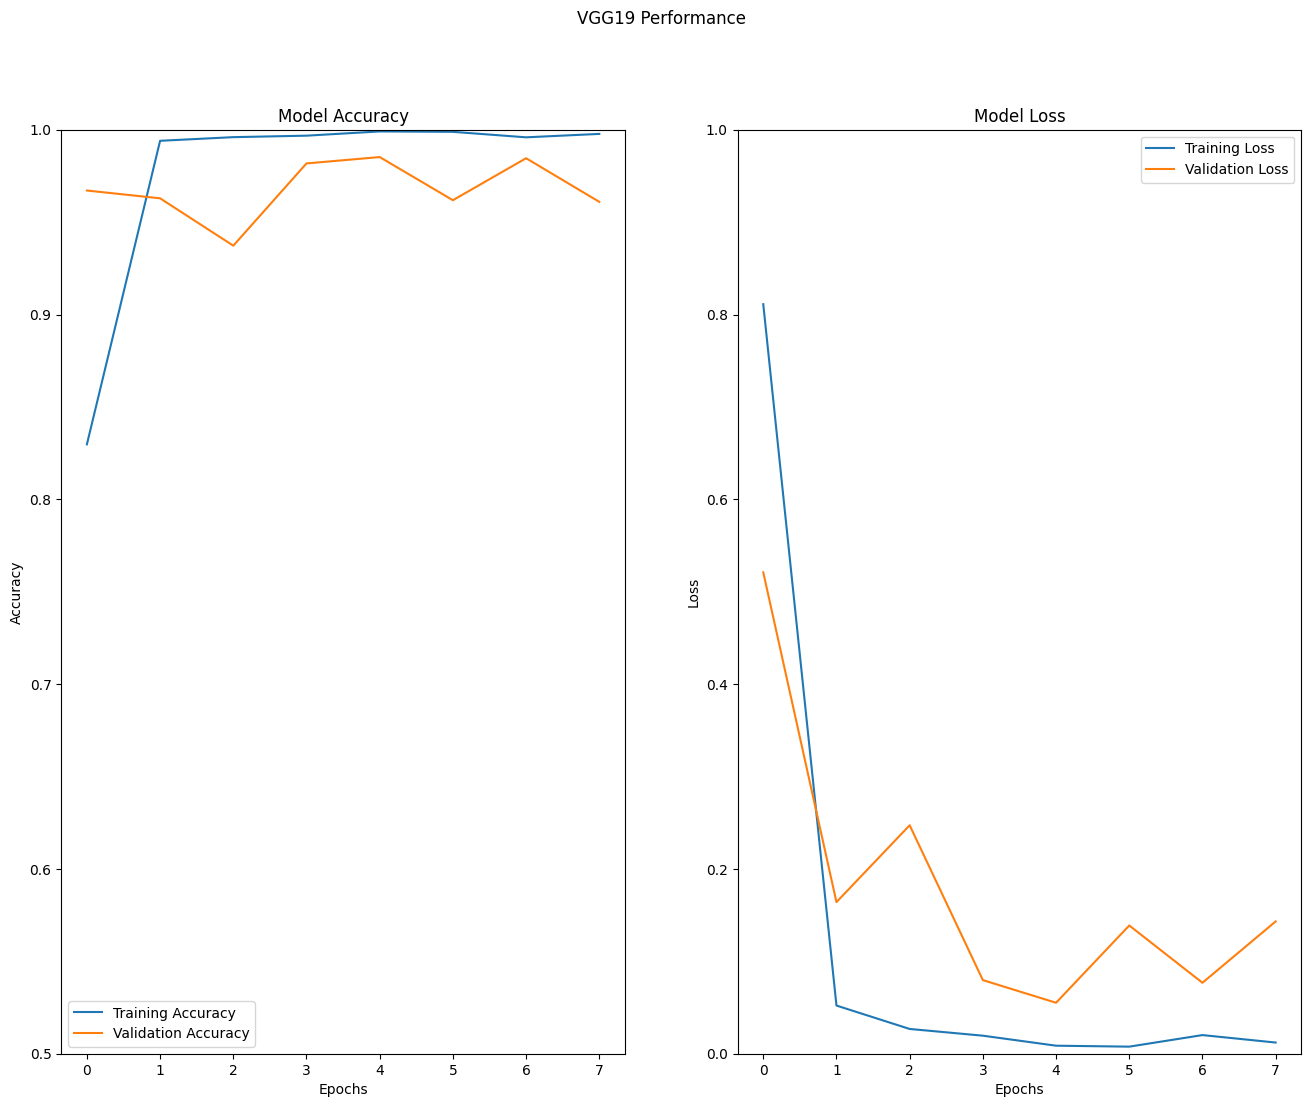

<Figure size 1000x700 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(vgg_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('VGG19 Performance')
plt.show()

VGG19-Based Model Evaluation on Test Data
--

The code block makes predictions on the test data using the trained VGG19-based model and assesses how accurate they are.
- __Making Predictions:__ Makes use of the learned VGG19-based model to forecast test data class probabilities.
- __Mapping Predictions:__ Uses the map_pred function to map the anticipated class indices to the labels of the associated traffic signs.
- __Accuracy Calculation:__ computes the accuracy_score function from scikit-learn for the VGG19-based model's predictions on the test data.
- __Print Accuracy:__ prints the model's accuracy based on the test data.

This offers a score for evaluating how effectively the VGG19-based model functions using test data that hasn't been seen yet. The accuracy score shows what proportion of traffic sign labels were properly anticipated.

In [ ]:
from sklearn.metrics import accuracy_score
pred = vgg_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 7s 16ms/step
Test Data accuracy:  90.49881235154395


Saving the VGG19-Based Model
--

This line saves the architecture, weights, and settings of the whole VGG19-based model to a file called "VGG.h5". It is usual practice to save models in the Hierarchical Data Format (HDF5) using the ".h5" extension.

In [ ]:
vgg_model.save("VGG.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualizing VGG19 Model Predictions on Validation Data
--

Using a batch of validation data, the code block creates a representation of the VGG19 model predictions.
- __Validation Data Batch:__ Takes an array of validation photos and labels from the test dataset.
- __Model Predictions:__ Makes use of the learned VGG19-based model to calculate the validation pictures' class probabilities.
- __Mapping Predictions:__ uses the map_pred function to map the anticipated class indices to the labels of the associated traffic signs.
- __Display Images:__ Shows the photos with both the expected and actual labels. The title appears in green if the forecast is accurate, and in red otherwise.

By evaluating the actual and expected labels, this image helps in evaluating how effectively the VGG19-based model is working with the validation data. Correct forecasts are shown by green titles, and wrong predictions are indicated by red titles.

5/5 [==============================] - 0s 14ms/step


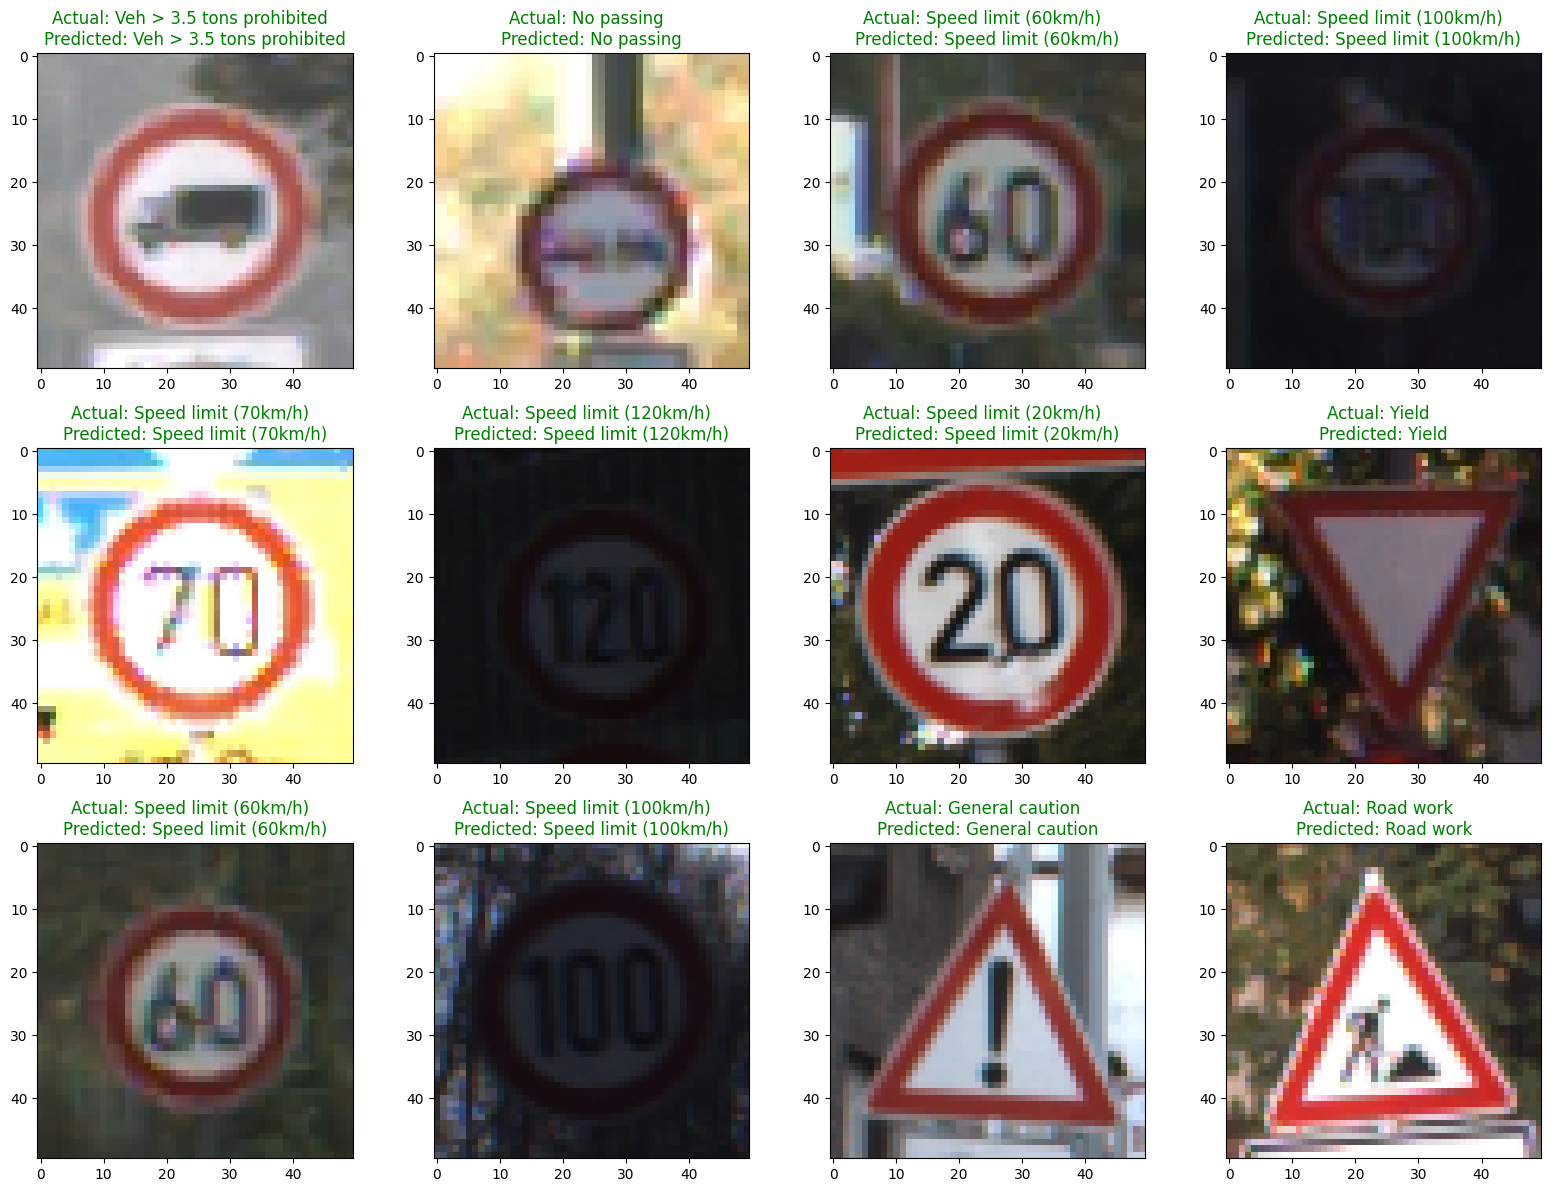

In [ ]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = vgg_model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))
for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()

Comparision of Taher's work and Our Modifications
--

 __**Original Models (Taher's Work):**__

***Model Architectures:***
- Three models were put into use: VGG19, CNN, and MobileNetV2.
- Two convolutional layers, pooling layers, and fully linked layers made up the CNN model.

***Data Processing:***
- Images were scaled to a specified height and width, and test data was imported from a CSV file.
- For assessment, predictions were linked to the labels on traffic signs.

***Results:***
- CNN Accuracy: 80.823%
- MobileNetV2 Accuracy: 35.629%
- VGG19 Accuracy: 88.883%

__**Modifications and Additions:**__

***Model Architectures:***
- More convolutional and pooling layers were added to the CNN model to boost its complexity.
- The VGG19 and MobileNetV2 models have been refined.

***Introduction of InceptionV3 Model:***
- Used a transfer learning model for InceptionV3 that has already been trained.
- Redesigned the architecture to incorporate more categorization levels for traffic signs.

__**Results after Modifications:**__

***Model Performances:***
- CNN Accuracy: 94.402%
- InceptionV3 Accuracy: 50.475%
- MobileNetV2 Accuracy: 37.862%
- VGG19 Accuracy: 90.4988%

Observations:
--

__Improvement in CNN Accuracy:__
- The accuracy of the CNN model increased significantly (from 80.823% to 94.402%) as a result of the changes made.

__Introduction of InceptionV3:__
- The InceptionV3-based model performed well for the traffic sign identification test, as seen by its respectable accuracy of 50.475%. This approach demonstrated the potential of leveraging existing knowledge for improved performance in scenarios with limited data.

__Model Complexity and Accuracy:__
- Higher accuracy was often attained by models with more complexity (more layers), however there is a trade-off in terms of processing power.

Implemented Technologies
--

There is no explicit usage of Spark or Hadoop in the traffic sign recognition model implemented by Mr. Taher. The code primarily relies on TensorFlow and Keras for building and training deep learning models, along with other standard Python libraries for data manipulation and visualization.

Spark and Hadoop are distributed computing frameworks designed for big data processing. They are commonly used for large-scale data processing and analytics on clusters of computers. In Taher's code or improved code, there is no indication of Spark or Hadoop being used for data processing or any distributed computing tasks.

Conclusion:
--

__Transfer Learning Impact:__
- The advantages of transfer learning can be seen by introducing a pre-trained InceptionV3 model, particularly in situations when training data is limited.

__Model Architecture Matters:__
- The accuracy was greatly increased by adding layers to the basic CNN architecture.

__Diversity in Model Types:__
- Combining several model architectures (InceptionV3, CNN) offered a wide range of methods for comparison.

__Consideration for Future Work:__
- Performance can be further improved by experimenting with different pre-trained models and fine-tuning hyperparameters.

To sum up, the incorporation and adjustments of transfer learning with InceptionV3 resulted in increased accuracy, proving the usefulness of these methods for traffic sign identification.

References:
--

[1] Shiyun Kong, "Self-supervised Image Classification Using Convolutional Neural Network", 2023 IEEE 3rd International Conference on Power, Electronics and Computer Applications (ICPECA), pp.1283-1290, 2023.

[2] Myat Nyein Chan, Thuzar Tint, "A Review on Advanced Detection Methods in Vehicle Traffic Scenes", 2021 6th International Conference on Inventive Computation Technologies (ICICT), pp.642-649, 2021.

[3] M. Sheng, C. Liu, Q. Zhang, L. Lou and Y. Zheng, "Vehicle Detection and Classification Using Convolutional Neural Networks," 2018 IEEE 7th Data Driven Control and Learning Systems Conference (DDCLS), Enshi, China, 2018, pp. 581-587, doi: 10.1109/DDCLS.2018.8516099.

[4] D. Yasmina, R. Karima and A. Ouahiba, "Traffic signs recognition with deep learning," 2018 International Conference on Applied Smart Systems (ICASS), Medea, Algeria, 2018, pp. 1-5, doi: 10.1109/ICASS.2018.8652024.

[5] O. Keiron and R. Nash, “An Introduction to Convolutional Neural Networks.” ArXiv abs/1511.08458 (2015): n. pag.

[6] A. Krizhevsky, I. Sutskever and G. E. Hinton, "Imagenet classification with deep convolutional neural networks", NIPS, 2012.
